In [5]:
import pandas as pd
# read the dataset
bcw = pd.read_csv("breast-cancer-wisconsin.data", header=None)

In [6]:
# drop first column--code number
bcw_new = bcw.iloc[:,1:11]
# imputated by mean property
for i in range(len(bcw_new)):
    for j in range(len(bcw_new.columns)):
        if(bcw_new.iloc[i,j]=='?'):
            bcw_new.iloc[i,j]=None
            bcw_new.iloc[i,j]=int(bcw_new.iloc[i].mean(skipna=True))
            break
# dataset features
bcw_f = bcw_new.iloc[:,:9]
# dataset label
bcw_l = bcw_new.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# first split 0.7 train dataset and 0.3 test dataset
train_data, test_data, train_label, test_label = train_test_split(bcw_f, bcw_l,
                                                                  random_state=None, train_size=0.7)
# how many classifier can make accuracy of the train 1.0
cnt = 1
while True:
    # Adaboost model
    clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2),
        n_estimators=cnt
    )
    clf.fit(train_data, train_label)
    acc = clf.score(train_data, train_label)
    if acc == 1.0:
        break
    cnt = cnt+1
print('number of classifier:',cnt)
    

#clf.fit(train_data, train_label)
#clf.score(train_data, train_label)
#pred = clf.predict(test_data)
#confusion_matrix(test_label, pred)

9


last accuracy: 0.9476190476190476


Text(0, 0.5, 'Average (Test)')

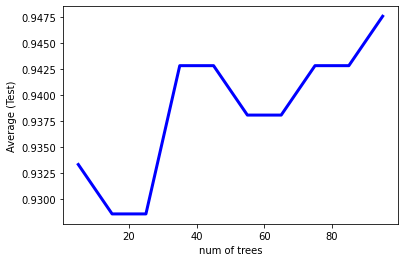

In [35]:
# accuracy plot of Adaboost from 5~95 
acc_list = []
num_list = [i for i in range(5,96,10)]
for num in range(5,96,10):
    # Adaboost model
    clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2),
        n_estimators=num
    )
    clf.fit(train_data, train_label)
    acc_list.append(clf.score(test_data, test_label))
print('last accuracy:',acc_list[-1])
    
from matplotlib import pyplot as plt
%matplotlib inline
# train avg plot
plt.plot(num_list, acc_list, color='b', linewidth=3)
plt.xlabel('num of trees')
plt.ylabel('Average (Test)')

last accuracy: 0.9428571428571428


Text(0, 0.5, 'Average (Test)')

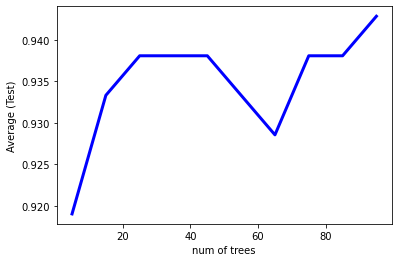

In [36]:
# accuracy plot of Adaboost from 5~101 
acc_list = []
num_list = [i for i in range(5,101,10)]
for num in range(5,96,10):
    # Adaboost model
    clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=num
    )
    clf.fit(train_data, train_label)
    acc_list.append(clf.score(test_data, test_label))
print('last accuracy:',acc_list[-1])

from matplotlib import pyplot as plt
%matplotlib inline
# train avg plot
plt.plot(num_list, acc_list, color='b', linewidth=3)
plt.xlabel('num of trees')
plt.ylabel('Average (Test)')